
#Statistical Analysis on Factors affecting Typing Speed

##Introduction
Typing is now one of the essential part of almost every job, since it lets you do your work very quickly and efficiently. This study aims to analyze the typing speed of students in IITH and tries to draw some conclusions based on the factors like gender, batch (degree program - UG, Masters or PhD) and branch, and checks if there is some relation between them and typing speed.

##Objective
The objective of our study is to ascertain factors affecting the
typing speed of students.




##**Data Collection**

###Variables of Interest
We want to see how the factors such as Gender, Batch, Branch of a student studying in IIT Hyderabad correlate to their typing speed.

Thus the independant variables are:
>1. Gender: Nominal Categorical Variable
>2. Batch: Ordinal Categorical Variable
>3. Branch: Nominal Categorical Variable

While the dependant variables are:
>1. Words Per Minute (WPM)

For the purpose of the analysis we will group branches into:
>1. Group1: CSE, AI, MA, ES
>2. Group2: CH, CE, MSME, BME, BTE
>3. Group3: ME, EP, EE, Physics
>4. Group4: LA, Design, Others

###Survey 
A google form was floated to the student body of IIT Hyderabad. They were asked to fill in their Age, Batch and Branch along with a screenshot of their results from the typing speed test 

 (website link: [monkeytype](https://monkeytype.com/))

##**Data Cleaning**

Some of the information collected in the data were incorrect, corrupted, incorrectly formatted and also were incomplete.

and thus we were required to clean the data before going ahead with our study

**Note**: Throughout the cleaning process, the rows with corruput values were dropped. In cases where we could infer the missing values from other columns, we made an intelligent guess and did so. 

In [ ]:
import pandas as pd
import numpy as np
import math
from scipy import stats
from random import sample

In [ ]:
#data cleaning
dirty_data = pd.read_csv("Dirty_Data.csv")
print(dirty_data.shape)
print(dirty_data.columns)
print(dirty_data.info())

(155, 6)
Index(['WPM', 'Accuracy', 'Your age', 'Your batch', 'Your branch', 'Gender'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   WPM          151 non-null    object
 1   Accuracy     150 non-null    object
 2   Your age     155 non-null    object
 3   Your batch   155 non-null    object
 4   Your branch  155 non-null    object
 5   Gender       155 non-null    object
dtypes: object(6)
memory usage: 7.4+ KB
None


The column names had spaces between them and hence were changed to a better format 

In [ ]:
#Changing column names
dirty_data.columns = ['WPM', 'Accuracy', 'Age', 'Batch','Branch','Gender']
print(dirty_data.columns)

Index(['WPM', 'Accuracy', 'Age', 'Batch', 'Branch', 'Gender'], dtype='object')


The cells which had corrupt values for WPM, accuracy were replaced with their respective medians.

In [ ]:
#there is an entry as '-' in the colum WPM, Accurcay, changing that to null
dirty_data['WPM'] = dirty_data['WPM'].replace({'-': None})
dirty_data['Accuracy'] = dirty_data['Accuracy'].replace({'-': None})
#changing the datatype of WPM, Accuracy to numeric
dirty_data['WPM'] = pd.to_numeric(dirty_data['WPM'])
dirty_data['Accuracy'] = pd.to_numeric(dirty_data['Accuracy'])
#replacing the null values in WPM, Accuracy with their respective medians
median_WPM = dirty_data['WPM'].median(axis=0)
median_acc = dirty_data['Accuracy'].median(axis=0)
print(median_WPM,median_acc)
dirty_data["WPM"].fillna(median_WPM, inplace = True)
dirty_data["Accuracy"].fillna(median_acc, inplace = True)
print(dirty_data.info())

52.5 96.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   WPM       155 non-null    float64
 1   Accuracy  155 non-null    float64
 2   Age       155 non-null    object 
 3   Batch     155 non-null    object 
 4   Branch    155 non-null    object 
 5   Gender    155 non-null    object 
dtypes: float64(2), object(4)
memory usage: 7.4+ KB
None


The corrupt entries in column age were changed based on the batch the student was studying

In [ ]:
#there is an entry with 19/20 in column age changing it to 20
dirty_data['Age'] = dirty_data['Age'].replace({"19/20": 20})
#there is an entry with Abhimanyu in column age, Since he is doing his masters, approximating his age to 22
dirty_data['Age'] = dirty_data['Age'].replace({"Abhimanyu": 22})
dirty_data['Age'] = pd.to_numeric(dirty_data['Age'])
print(dirty_data.info())
print(dirty_data['Age'].min(),dirty_data['Age'].max())
#The 44 year old is doing PHD 
dirty_data['Age'].unique()
#higher ages(>24) belong to non UG batches

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   WPM       155 non-null    float64
 1   Accuracy  155 non-null    float64
 2   Age       155 non-null    int64  
 3   Batch     155 non-null    object 
 4   Branch    155 non-null    object 
 5   Gender    155 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 7.4+ KB
None
18 44


array([28, 23, 25, 20, 18, 33, 19, 22, 31, 26, 24, 29, 21, 27, 38, 44, 35])

Checking for typos/incorrect entries in the Batch Column

In [ ]:
dirty_data['Batch'].unique()

array(['PHD', 'M.Sc/M.Des/M.Tech', 'UG', 'MDS (M.Tech in Data Science)',
       'MA', 'M.Sc/M.Des/M.Techh'], dtype=object)

Batches were grouped into UG, PhD and Masters. Masters encompassed of Mdes, Mtech, Msc etc. The data types for the columns were changed into their corresponding appropriate data types.

In [ ]:
dirty_data['Batch']=dirty_data['Batch'].replace(to_replace =["M.Sc/M.Des/M.Tech", "MDS (M.Tech in Data Science)","MA","M.Sc/M.Des/M.Techh"], 
                            value ="Masters")
print(dirty_data['Batch'].unique())
dirty_data['Batch'] = pd.Series(dirty_data['Batch'], dtype="string")
print(dirty_data.info())

['PHD' 'Masters' 'UG']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   WPM       155 non-null    float64
 1   Accuracy  155 non-null    float64
 2   Age       155 non-null    int64  
 3   Batch     155 non-null    string 
 4   Branch    155 non-null    object 
 5   Gender    155 non-null    object 
dtypes: float64(2), int64(1), object(2), string(1)
memory usage: 7.4+ KB
None


Checking for typos/incorrect entries in the Gender Column

In [ ]:
dirty_data['Gender'].unique()
dirty_data['Gender'] = pd.Series(dirty_data['Gender'], dtype="string")
print(dirty_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   WPM       155 non-null    float64
 1   Accuracy  155 non-null    float64
 2   Age       155 non-null    int64  
 3   Batch     155 non-null    string 
 4   Branch    155 non-null    object 
 5   Gender    155 non-null    string 
dtypes: float64(2), int64(1), object(1), string(2)
memory usage: 7.4+ KB
None


In [ ]:
dirty_data['Branch'] = pd.Series(dirty_data['Branch'], dtype="string")

Coming to branches, there were many different ways in which a single branch was written, for example, cse was written as [COmputer Science, cs, cse] etc. We changed all such values to a uniform branch code.

In [ ]:
dirty_data=dirty_data.replace(to_replace =['Mathematics',
       'Mathematics and Computing', 'MATHEMATICS AND COMPUTING',
       'Mathematics and computing', 'Mathematics and Computing ','MNC','Mnc','MnC'], 
                            value ="MA")
dirty_data=dirty_data.replace(to_replace =['AI','Ai'], 
                            value ="AI")
dirty_data=dirty_data.replace(to_replace =['bme', 'bme engineering',
       'bme Engineering'], 
                            value ="BME")
dirty_data=dirty_data.replace(to_replace =['Biotechnology', 'biotechnology'], 
                            value ="BTE")
dirty_data=dirty_data.replace(to_replace =['Chemical', 'CHEMICAL',
       'CH', 'Chemical Engineering'], 
                            value ="CH")
dirty_data=dirty_data.replace(to_replace =['CIVIL', 'civil',
       'Civil Engineering', 'CE ', 'Civil Engineering Department '], 
                            value ="CE")
dirty_data=dirty_data.replace(to_replace =['Computer Science', 'Computer science',
       'Computer Science ',
       'Computer Science : Basically, I am a CODER : )',
       'Computer Science and Engineering', 'CS', 'CSE', 'cse'], 
                            value ="CSE")
dirty_data=dirty_data.replace(to_replace =['EE', 'Electrical ',
       'Electrical Engineering', 'Electrical Engineering ',
       'Electrical Engineering - Microelectronics & VLSI',
       'Electrical Engineering - Microelectronics and VLSI'], 
                            value ="EE")
dirty_data=dirty_data.replace(to_replace =['ME',
       'Mechanical', 'Mechanical ',
       'Mechanical and Aerospace Engineering', 'Mechanical Department',
       'Mechanical Engineering', 'Mechanical engineering'], 
                            value ="ME")
dirty_data=dirty_data.replace(to_replace =['ep',
       'Engineering Physics'], 
                            value ="EP")
dirty_data=dirty_data.replace(to_replace =[
       'MSc Physics'], 
                            value ="Physics")
dirty_data=dirty_data.replace(to_replace =['NIS','Climate Change',
       'Smart Mobility', 'Center of Interdisciplinary Program','E-waste Resource Engineering and Management','DEVELOPMENT STUDIES','Entrepreneurship and Management'], 
                            value ="Others")
dirty_data=dirty_data.replace(to_replace =[
       'Liberal Arts'], 
                            value ="LA")
dirty_data=dirty_data.replace(to_replace =[
       'Engineering Science'], 
                            value ="ES")
dirty_data=dirty_data.replace(to_replace =[
       'Masters in Design'], 
                            value ="Design")
dirty_data=dirty_data.replace(to_replace =[
       'materials science engg'], 
                            value ="MSME")
dirty_data = dirty_data[dirty_data.Branch
                        != '2019']
dirty_data = dirty_data[dirty_data.Branch
                        != '2020-22']

A new column was added that specified the group the student's branch came under.

In [ ]:
def calc_new_col(row):
    if row['Branch'] in ['CSE','MA','AI','ES']:
        return 1
    elif row['Branch'] in ['CH','CE','MSME','BME','BTE']:
        return 2
    elif row['Branch'] in ['EP','EE','ME','Physics']:
        return 3
    else:
        return 4

dirty_data["Groups"] = dirty_data.apply(calc_new_col, axis=1)

In [ ]:
print(dirty_data)

      WPM  Accuracy  Age    Batch  Branch  Gender  Groups
2    39.0      85.0   25  Masters      AI    Male       1
3    53.0      97.0   20       UG      AI    Male       1
4    68.0      98.0   18       UG      AI    Male       1
5    50.0      99.0   33      PHD      AI    Male       1
6    78.0      97.0   19       UG      AI  Female       1
..    ...       ...  ...      ...     ...     ...     ...
150  63.0      96.0   26      PHD  Design    Male       4
151  58.0      96.0   24  Masters  Design    Male       4
152  55.0      95.0   25      PHD      LA    Male       4
153  46.0      96.0   27      PHD      CH    Male       2
154  47.0      94.0   22  Masters      CH  Female       2

[153 rows x 7 columns]


Our Data has been cleaned and now is ready for further analysis

In [ ]:
dirty_data.to_csv('clean_data.csv')

##A Potential Issue
The data was collected through a survey, which is an example of convenience sampling, hence there is a possibilty of the dataframe generated to be biased.

Through the process of simple random sampling(selecting a number of random samples from the collected data), we can deal with the issue of bias upto some extent, however for the statiscal analysis that will happen further into the study to hold true, the dataframe that generates the sample needs to be normally distributed 

Hence we need to verify the normality of our dataframe.

##Histogram Test
We generate the histogram plot of frequency vs WPM and compare it to a normal probabilty curve

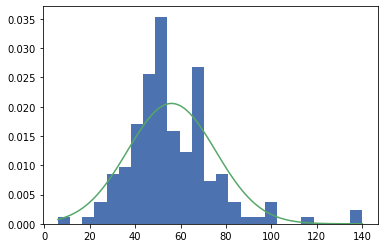

In [ ]:
data_frame = pd.read_csv('clean_data.csv')
from scipy.stats import norm
from numpy import mean,std
mean = mean(data_frame['WPM'])
std = std(data_frame['WPM'])
min_weight = min(data_frame['WPM'])
max_weight = max(data_frame['WPM'])
values = np.linspace(min_weight, max_weight,100)
from matplotlib import pyplot
pyplot.hist(data_frame['WPM'], bins=25, density=True) 
pyplot.plot(values, norm.pdf(values, mean, std))

We can see from the above graph that our dataframe may not be normally distributed.

We run a p-value test for normality, to verify whether our dataframe is normally distributed.

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(data_frame['WPM'])
alpha = 0.05
if p > alpha:
    print('data is normally distributed (fail to reject H0)')
else:
    print('data is not normally distributed (reject H0)')

data is not normally distributed (reject H0)


The above test concludes that our dataframe collected from the survey is not normally distributed.

##Using Central Limit Theorem
The Central Limit Theorem states that:

Let $X_{1}, X_{2},..., X_{n}$ be a sequence of random i.i.d variables with a mean $\mu$ and variance $\sigma^2$. Let $\bar{X_{n}} = \frac{1}{n}\sum_{i=1}^n X_{i}$. Then,
>>>$\bar{X_{n}} \sim N\left(\mu, \frac{\sigma^2}{n}\right)$ 

Which means that the sample distribution of sample means is approximately normal.

The central Limit Theorem also states that as n increases the sample distribution of sample means of skewed data also approaches normality

####The sample distribution of sample means of our dataframe
We are going to generate $10^5$ samples means from samples of each size $30$ from our dataframe

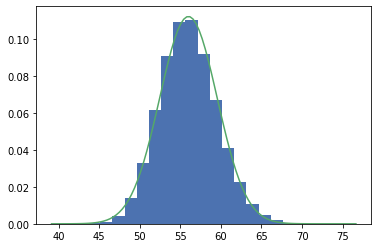

In [ ]:
lisw=[]
for i in range(0,int(1e5)):
  df=data_frame.sample(n=30, replace=True)
  lisw.append(df["WPM"].mean())
from scipy.stats import norm
from numpy import mean,std
mean = mean(lisw)
std = std(lisw)
min_weight = min(lisw)
max_weight = max(lisw)
values = np.linspace(min_weight, max_weight,100)
from matplotlib import pyplot
pyplot.hist(lisw, bins=25, density=True) # , 
pyplot.plot(values, norm.pdf(values, mean, std))

From the histogram and corresponding normal curve we can say that the sample distribution of $10^5$ sample means from samples each of size $30$ is normally distributed.

Since we know the distribution of sample means is normal, we can go ahead with further statistical analysis by randomly selecting $n$ number of samples from this normal distribution.
And this idea will be the basic ground of our study. We will filter our dataframe into the two genders, three batches, four groups based on the branches and generate 9 new dataframes.

$10^5$ sample means from samples each of size $30$ will be generated from each of these 9 dataframes, and we will randomly sample 100 means from each of these normal distributions.
These 9 new samples generated from their respective sampling distribution of sample means will act as our sample data sets and be used for further statistical analysis in our study.



**Note**: Further into the study we use the term "Average WPM" of a category , by this we mean- **the average typing speed of a group of 30 random people fitting the category**

In [ ]:
#generating samples from a sample of sample means
def gen_sample(data,col_name):
  lisw = []
  for i in range(0,int(1e5)):
    df=data[col_name].sample(n=30, replace=True)
    lisw.append(df.mean())
  final_sample = sample(lisw,100)
  return final_sample

In [ ]:
data = pd.read_csv("clean_data.csv")
female = gen_sample(data[data['Gender']=='Female'],"WPM")
male = gen_sample(data[data['Gender']=='Male'],"WPM")
ug = gen_sample(data[data['Batch']=='UG'],"WPM")
masters = gen_sample(data[data['Batch']=='Masters'],"WPM")
phd = gen_sample(data[data['Batch']=='PHD'],"WPM")
group1 = gen_sample(data[data['Groups']==1],"WPM")
group2 = gen_sample(data[data['Groups']==2],"WPM")
group3 = gen_sample(data[data['Groups']==3],"WPM")
group4 = gen_sample(data[data['Groups']==4],"WPM")


In [ ]:
sample_female = pd.DataFrame(female,columns=["Average_WPM"])
sample_female["Gender"] = "Female"
sample_male = pd.DataFrame(male,columns=["Average_WPM"])
sample_male["Gender"] = "Male"
sample_ug = pd.DataFrame(ug,columns=["Average_WPM"])
sample_ug["Batch"] = "UG"
sample_masters = pd.DataFrame(masters,columns=["Average_WPM"])
sample_masters["Batch"] = "Masters"
sample_phd = pd.DataFrame(phd,columns=["Average_WPM"])
sample_phd["Batch"] = "PHD" 
sample_group1 = pd.DataFrame(group1,columns=["Average_WPM"])
sample_group1["Groups"] = 1 
sample_group2 = pd.DataFrame(group2,columns=["Average_WPM"])
sample_group2["Groups"] = 2
sample_group3 = pd.DataFrame(group3,columns=["Average_WPM"])
sample_group3["Groups"] = 3
sample_group4 = pd.DataFrame(group4,columns=["Average_WPM"])
sample_group4["Groups"] = 4

In [ ]:
#We are going to use a confidence interval of 95% in the analysis
alpha = 0.05

##**Summary of sample data**
Below is the list of sample mean and sample variance of the 9 dataframes

In [ ]:
#calculate sample mean and variance
def sample_calc(data,col_name):
  mean_data = data[col_name].mean(axis=0) #calculates mean of sample
  variance_data = data[col_name].var(axis=0) #calculates variance of sample
  mean_var = [mean_data,variance_data]
  return mean_var  #returns the mean and variance

In [ ]:
[mean_male,var_male] = sample_calc(sample_male,"Average_WPM")
[mean_female,var_female] = sample_calc(sample_female,"Average_WPM")
[mean_ug,var_ug] = sample_calc(sample_ug,"Average_WPM")
[mean_mas,var_mas] = sample_calc(sample_masters,"Average_WPM")
[mean_phd,var_phd] = sample_calc(sample_phd,"Average_WPM")
[mean_g1,var_g1] = sample_calc(sample_group1,"Average_WPM")
[mean_g2,var_g2] = sample_calc(sample_group2,"Average_WPM")
[mean_g3,var_g3] = sample_calc(sample_group3,"Average_WPM")
[mean_g4,var_g4] = sample_calc(sample_group4,"Average_WPM")

In [ ]:
print("mean of average WPM of males is:",mean_male)
print("mean of average WPM of  females is:",mean_female)
print("mean of average WPM of UG students is:",mean_ug)
print("mean of average WPM of Masters students is:",mean_mas)
print("mean of average WPM of PHD students is:",mean_phd)
print("mean of average WPM of Group1 students is:",mean_g1)
print("mean of average WPM of Group2 students is:",mean_g2)
print("mean of average WPM of Group3 students is:",mean_g3)
print("mean of averagef WPM of Group4 students is:",mean_g4)
print("\n")
print("variance of average WPM of males is:",var_male)
print("variance of average WPM of females is:",var_female)
print("variance of average WPM of UG students is:",var_ug)
print("variance of average WPM of Masters students is:",var_mas)
print("variance of average WPM of PHD students is:",var_phd)
print("variance of average WPM of Group1 students is:",var_g1)
print("variance of average WPM of Group2 students is:",var_g2)
print("variance of average WPM of Group3 students is:",var_g3)
print("variance of average WPM of Group4 students is:",var_g4)

mean of average WPM of males is: 58.261453333333336
mean of average WPM of  females is: 50.529166666666676
mean of average WPM of UG students is: 56.85333333333334
mean of average WPM of Masters students is: 56.35172000000001
mean of average WPM of PHD students is: 54.2545
mean of average WPM of Group1 students is: 63.2705
mean of average WPM of Group2 students is: 45.387
mean of average WPM of Group3 students is: 53.85316666666666
mean of averagef WPM of Group4 students is: 55.13466666666666


variance of average WPM of males is: 15.35923269476992
variance of average WPM of females is: 4.2122748316498315
variance of average WPM of UG students is: 19.310454545454544
variance of average WPM of Masters students is: 12.556594461773296
variance of average WPM of PHD students is: 5.272776964085297
variance of average WPM of Group1 students is: 16.523910521885522
variance of average WPM of Group2 students is: 4.506664309764308
variance of average WPM of Group3 students is: 11.060207707070708

##**Data Visualization**
The Data has been visualized in 3 categories
* Gender
* Batch
* Branch

Histograms and box plots have been plotted for each category


In [ ]:
import random
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

def plot(lis,labels,num_bins):
  li=[]
  for i in lis:
    li.append(i['Average_WPM'].to_numpy())
  
  plt.style.use('seaborn-deep')

  bins = np.linspace(40, 80, num_bins)

  #print(bins,sf,sm)
  plt.hist(li, bins, label=labels)
  plt.legend(loc='upper right')
  plt.show()

def box_plot(lis,labels):
  both = pd.concat(lis)
  ax = sns.boxplot(x=labels,y ="Average_WPM",data=both)
  plt.show()

###Gender Based

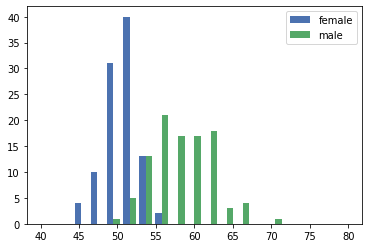

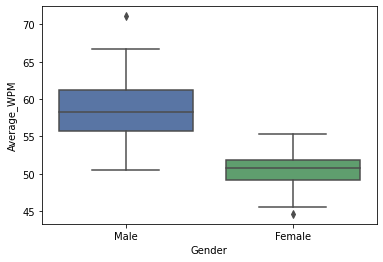

In [ ]:
plot([sample_female,sample_male],['female','male'],20)
box_plot([sample_male, sample_female],"Gender")

###Inference:
1. Histogram Plot:
 * Average WPM of Males is higher than that of females
 * Females have a higher frequency than males for lower average WPM, and only males seem to cover an average WPM of greater than 55
2. Box Plot:
 * Males have wider spread of average WPM as compared to females.

###Batch Based

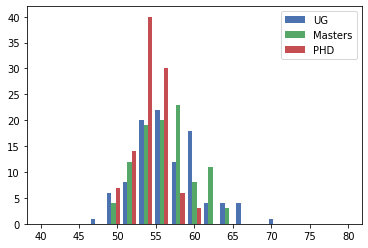

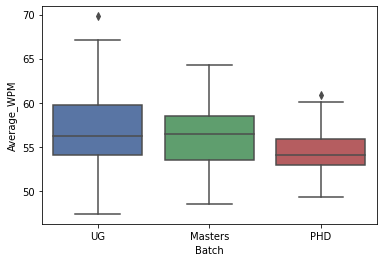

In [ ]:
plot([sample_ug,sample_masters,sample_phd],['UG','Masters','PHD'],20)
box_plot([sample_ug,sample_masters,sample_phd],"Batch")

###Inference:
1. Histogram Plot:
 * The average WPM across batches for various groups is comparable.
2. Box Plot:
 * UG students have a wider spread of avergae WPM as compared to the other two batches but the medians are comparable

###Branch Based

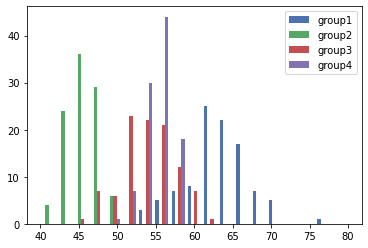

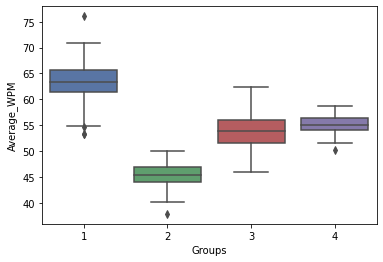

In [ ]:
plot([sample_group1,sample_group2,sample_group3,sample_group4],['group1','group2','group3','group4'],20)
box_plot([sample_group1,sample_group2,sample_group3,sample_group4],"Groups")

###Inference:
1. Histogram Plot:
 * Group 1 has highest average WPM across various groups while group 2 has the least.
2. Box Plot:
 * Group 1 and 3 have higher spread in average WPM as compared to other two groups.
 * Group 1 has three outliers in the average WPMs.

##**Analyzing the Data**

##Confidence interval estimation
With the data of the sample, the quantities like population mean and variance can be estimated using the concept of Confidence Interval.

###Confidence Interval for Estimating Population Mean
If $X_{1}, X_{2},..., X_{n}$ are normally distributed with an unknown mean $\mu$ and unknown variance $\sigma^2$, then a $(1 - \alpha)100\%$ Confidence interval for the population mean $\mu$ is:

>>>$\left(\bar{X} - t_{\alpha/2,n-1}\left(\frac{S}{\sqrt{n}}\right), \bar{X} + t_{\alpha/2,n-1}\left(\frac{S}{\sqrt{n}}\right)\right)$

In [ ]:
#calculates confidence interval of population mean
def sample_CI_mean(data,col_name):
  n = len(data[col_name])
  [mean,var] = sample_calc(data,col_name)
  t=stats.t.ppf(q=1-alpha/2,df=n-1)
  LI = mean - (t*(math.sqrt(var)/math.sqrt(n)))
  RI = mean + (t*(math.sqrt(var)/math.sqrt(n)))
  interval = [LI,RI]
  return interval #returns the confidence interval 

In [ ]:
wpm_male_CI_mean=sample_CI_mean(sample_male,"Average_WPM")
wpm_female_CI_mean=sample_CI_mean(sample_female,"Average_WPM")
wpm_ug_CI_mean=sample_CI_mean(sample_ug,"Average_WPM")
wpm_masters_CI_mean=sample_CI_mean(sample_masters,"Average_WPM")
wpm_phd_CI_mean=sample_CI_mean(sample_phd,"Average_WPM")
wpm_group1_CI_mean=sample_CI_mean(sample_group1,"Average_WPM")
wpm_group2_CI_mean=sample_CI_mean(sample_group2,"Average_WPM")
wpm_group3_CI_mean=sample_CI_mean(sample_group3,"Average_WPM")
wpm_group4_CI_mean=sample_CI_mean(sample_group4,"Average_WPM")


In [ ]:
print("CI for population mean of average WPM of male students is:",wpm_male_CI_mean)
print("CI for population mean of average WPM of female students is:",wpm_female_CI_mean)
print("CI for population mean of average WPM of UG students is:",wpm_ug_CI_mean)
print("CI for population mean of average WPM of Masters students is:",wpm_masters_CI_mean)
print("CI for population mean of average WPM of PHD students is:",wpm_phd_CI_mean)
print("CI for population mean of average WPM of group1 students is:",wpm_group1_CI_mean)
print("CI for population mean of average WPM of group2 students is:",wpm_group2_CI_mean)
print("CI for population mean of average WPM of group3 students is:",wpm_group3_CI_mean)
print("CI for population mean of average WPM of group4 students is:",wpm_group4_CI_mean)

CI for population mean of average WPM of male students is: [57.48382170603636, 59.03908496063031]
CI for population mean of average WPM of female students is: [50.121929408154976, 50.936403925178375]
CI for population mean of average WPM of UG students is: [55.981395737267356, 57.72527092939932]
CI for population mean of average WPM of Masters students is: [55.648607061734204, 57.05483293826581]
CI for population mean of average WPM of PHD students is: [53.79887362508949, 54.71012637491051]
CI for population mean of average WPM of group1 students is: [62.4639234844365, 64.0770765155635]
CI for population mean of average WPM of group2 students is: [44.96577245739843, 45.80822754260157]
CI for population mean of average WPM of group3 students is: [53.193277806335935, 54.513055526997384]
CI for population mean of average WPM of group4 students is: [54.795168630751625, 55.474164702581696]


###Confidence Interval for estimating population variance
If $X_1, X_2,..., X_n$ are normally distributed and $a = \chi^2_{1-\alpha/2,n-1}$, $b = \chi^2_{\alpha/2,n-1}$, then  $(1 - \alpha)100\%$ CI for the population variance $\sigma^2$ is:
>>>$ \left(\dfrac{(n-1)S^2}{b}, \dfrac{(n-1)S^2}{a}\right)$

In [ ]:
#calculate confidence interval for variance
def sample_CI_var(data,col_name):
  n = len(data[col_name])
  [mean,var] = sample_calc(data,col_name)
  a = stats.chi2.ppf(1-alpha/2, n-1)
  b = stats.chi2.ppf(alpha/2, n-1)
  CI_var = (n-1)*var/a, (n-1)*var/b
  return CI_var

In [ ]:
wpm_male_CI_var=sample_CI_var(sample_male,"Average_WPM")
wpm_female_CI_var=sample_CI_var(sample_female,"Average_WPM")
wpm_ug_CI_var=sample_CI_var (sample_ug,"Average_WPM")
wpm_masters_CI_var=sample_CI_var(sample_masters,"Average_WPM")
wpm_phd_CI_var=sample_CI_var(sample_phd,"Average_WPM")
wpm_group1_CI_var=sample_CI_var(sample_group1,"Average_WPM")
wpm_group2_CI_var=sample_CI_var(sample_group2,"Average_WPM")
wpm_group3_CI_var=sample_CI_var(sample_group3,"Average_WPM")
wpm_group4_CI_var=sample_CI_var(sample_group4,"Average_WPM")

In [ ]:
print("CI for variance of average WPM of male students is:",wpm_male_CI_var)
print("CI for variance of average WPM of female students is:",wpm_female_CI_var)
print("CI for variance of average WPM of UG students is:",wpm_ug_CI_var)
print("CI for variance of average WPM of Masters students is:",wpm_masters_CI_var)
print("CI for variance of average WPM of PHD students is:",wpm_phd_CI_var)
print("CI for variance of average WPM of Group1 students is:",wpm_group1_CI_var)
print("CI for variance of average WPM of Group2 students is:",wpm_group2_CI_var)
print("CI for variance of average WPM of Group3 students is:",wpm_group3_CI_var)
print("CI for variance of average WPM of Group4 students is:",wpm_group4_CI_var)

CI for variance of average WPM of male students is: (11.84037136349979, 20.72712169473871)
CI for variance of average WPM of female students is: (3.247225905291533, 5.6844202299911135)
CI for variance of average WPM of UG students is: (14.886352564605728, 26.059253694401583)
CI for variance of average WPM of Masters students is: (9.679828702568383, 16.94499111073959)
CI for variance of average WPM of PHD students is: (4.064762778998456, 7.115556615079203)
CI for variance of average WPM of Group1 students is: (12.738216865676376, 22.298842075406498)
CI for variance of average WPM of Group2 students is: (3.474169582469445, 6.081695709814214)
CI for variance of average WPM of Group3 students is: (8.526270108125438, 14.925633048817849)
CI for variance of average WPM of Group4 students is: (2.2567945529034272, 3.950624005109449)


###Confidence Interval for estimating difference of population means
####Welch’s t-interval
If $X_1,X_2,...,X_n \sim N(\mu_1,\sigma_X^2)$ and $Y_1,Y_2,...,Y_m \sim N(\mu_2,\sigma_Y^2)$ are independent random samples with unequal population variance, then a $(1 - \alpha)100\%$ CI for the difference in the population means, $\mu_1-\mu_2$ is: 
>>>$\left((\bar{X}-\bar{Y})-t_{\alpha/2,r}\sqrt{\frac{S_X^2}{n}+\frac{S_Y^2}{m}}, \ (\bar{X}-\bar{Y})+t_{\alpha/2,r}\sqrt{\frac{S_X^2}{n}+\frac{S_Y^2}{m}}\right)$

>>>Where $r$ = integer part of $\dfrac{\left(\frac{S_X^2}{n}+\frac{S_Y^2}{m}\right)^2}{\frac{\left(S_X^2/n\right)^2}{n-1} + \frac{\left(S_Y^2/m\right)^2}{m-1}}$
        

In [ ]:
# calculates confidence interval difference of the two population means
def diff_two_means(data_1,col_name_1,data_2,col_name_2):
  n1 = len(data_1[col_name_1])
  n2 = len(data_2[col_name_2])
  [mean_1,var_1] = sample_calc(data_1,col_name_1)   
  [mean_2,var_2] = sample_calc(data_2,col_name_2)
  p = var_1/n1
  q = var_2/n2
  r = int((p+q)**2/((p**2/(n1-1))+(q**2/(n2-1))))
  t=stats.t.ppf(q=1-alpha/2,df=r)
  LI = (mean_1-mean_2) - t*(math.sqrt(p+q))
  RI = (mean_1-mean_2) + t*(math.sqrt(p+q))
  interval = [LI,RI]
  return interval #returns confidence interval

In [ ]:
wpm_gender_diff_two_means=diff_two_means(sample_male,"Average_WPM",sample_female,"Average_WPM")
wpm_ug_masters_diff_two_means=diff_two_means(sample_ug,"Average_WPM",sample_masters,"Average_WPM")
wpm_ug_phd_diff_two_means=diff_two_means(sample_ug,"Average_WPM",sample_phd,"Average_WPM")
wpm_masters_phd_diff_two_means=diff_two_means(sample_masters,"Average_WPM",sample_phd,"Average_WPM")
wpm_group1_group2_diff_two_means=diff_two_means(sample_group1,"Average_WPM",sample_group2,"Average_WPM")
wpm_group1_group3_diff_two_means=diff_two_means(sample_group1,"Average_WPM",sample_group3,"Average_WPM")
wpm_group1_group4_diff_two_means=diff_two_means(sample_group1,"Average_WPM",sample_group4,"Average_WPM")
wpm_group2_group3_diff_two_means=diff_two_means(sample_group2,"Average_WPM",sample_group3,"Average_WPM")
wpm_group2_group4_diff_two_means=diff_two_means(sample_group2,"Average_WPM",sample_group4,"Average_WPM")
wpm_group3_group4_diff_two_means=diff_two_means(sample_group3,"Average_WPM",sample_group4,"Average_WPM")

In [ ]:
print("CI of difference of population means of average WPM of Males and females:",wpm_gender_diff_two_means)
print("\n")
print("CI of difference of population means of average WPM of UG and Masters:",wpm_ug_masters_diff_two_means)
print("CI of difference of population means of average WPM of UG and PHD:",wpm_ug_phd_diff_two_means)
print("CI of difference of population means of average WPM of Masters and PHD:",wpm_masters_phd_diff_two_means)
print("\n")
print("CI of difference of population means of average WPM of group1 and group2:",wpm_group1_group2_diff_two_means)
print("CI of difference of population means of average WPM of group1 and group3:",wpm_group1_group3_diff_two_means)
print("CI of difference of population means of average WPM of group1 and group4:",wpm_group1_group4_diff_two_means)
print("CI of difference of population means of average WPM of group2 and group3:",wpm_group2_group3_diff_two_means)
print("CI of difference of population means of average WPM of group2 and group4:",wpm_group2_group4_diff_two_means)
print("CI of difference of population means of average WPM of group3 and group4:",wpm_group3_group4_diff_two_means)

CI of difference of population means of average WPM of Males and females: [6.858104432670078, 8.606468900663241]


CI of difference of population means of average WPM of UG and Masters: [-0.6119344801842117, 1.6151611468508746]
CI of difference of population means of average WPM of UG and PHD: [1.6190967564463947, 3.5785699102202826]
CI of difference of population means of average WPM of Masters and PHD: [1.2636592377387386, 2.930780762261276]


CI of difference of population means of average WPM of group1 and group2: [16.97731804811756, 18.789681951882436]
CI of difference of population means of average WPM of group1 and group3: [8.38134999771158, 10.453316668955098]
CI of difference of population means of average WPM of group1 and group4: [7.263478280871958, 9.008188385794718]
CI of difference of population means of average WPM of group2 and group3: [-9.245078976210449, -7.687254357122868]
CI of difference of population means of average WPM of group2 and group4: [-10.285507645695652,

###Confidence Interval for estimating ratio of population variance
If $X_1, X_2,..., X_n \sim N(\mu_X,\sigma_X^2)$ and $Y_1,Y_2,...,Y_m \sim N(\mu_Y,\sigma_Y^2)$ are independent samples and $c = F_{\alpha/2}(m-1, n-1)$, $d = F_{1-\alpha/2}(m-1, n-1)$,then the ratio of population variance lies in the interval:

>>>$\left(c\dfrac{S_X^2}{S_Y^2},\  d\dfrac{S_X^2}{S_Y^2}\right)$

In [ ]:
#calculate confidence interval for ratio of the variance
def ratio_two_var(data_1,col_name_1,data_2,col_name_2):
  n1 = len(data_1[col_name_1])
  n2 = len(data_2[col_name_2])
  [mean1,var1] = sample_calc(data_1,col_name_1)   
  [mean2,var2] = sample_calc(data_2,col_name_2)
  c1=stats.f.ppf(alpha/2,n2-1,n1-1)
  d1=stats.f.ppf(1-alpha/2,n2-1,n1-1)
  LI_ratio=c1*(var1/var2)
  RI_ratio=d1*(var1/var2)
  CI=LI_ratio,RI_ratio
  return CI

In [ ]:
wpm_gender_ratio_two_var=ratio_two_var(sample_male,"Average_WPM",sample_female,"Average_WPM")
wpm_ug_masters_ratio_two_var=ratio_two_var(sample_ug,"Average_WPM",sample_masters ,"Average_WPM")
wpm_ug_phd_ratio_two_var=ratio_two_var(sample_ug,"Average_WPM",sample_phd ,"Average_WPM")
wpm_phd_masters_ratio_two_var=ratio_two_var(sample_phd,"Average_WPM",sample_masters ,"Average_WPM")
wpm_group1_group2_ratio_two_var=ratio_two_var(sample_group1,"Average_WPM",sample_group2 ,"Average_WPM")
wpm_group1_group3_ratio_two_var=ratio_two_var(sample_group1,"Average_WPM",sample_group3 ,"Average_WPM")
wpm_group1_group4_ratio_two_var=ratio_two_var(sample_group1,"Average_WPM",sample_group4 ,"Average_WPM")
wpm_group2_group3_ratio_two_var=ratio_two_var(sample_group2,"Average_WPM",sample_group3 ,"Average_WPM")
wpm_group2_group4_ratio_two_var=ratio_two_var(sample_group2,"Average_WPM",sample_group4 ,"Average_WPM")
wpm_group3_group4_ratio_two_var=ratio_two_var(sample_group3,"Average_WPM",sample_group4 ,"Average_WPM")

In [ ]:
print("ratio of variances of average WPM of male and females is:",wpm_gender_ratio_two_var)
print("\n")
print("ratio of variances of average WPM of UG and Masters is:",wpm_ug_masters_ratio_two_var)
print("ratio of variances of average WPM of UG and PHD is:",wpm_ug_phd_ratio_two_var)
print("ratio of variances of average WPM of PHD and Masters is:",wpm_phd_masters_ratio_two_var)
print("\n")
print("ratio of variances of average WPM of group1 and group2 is:",wpm_group1_group2_ratio_two_var)
print("ratio of variances of average WPM of group1 and group3 is:",wpm_group1_group3_ratio_two_var)
print("ratio of variances of average WPM of group1 and group4 is:",wpm_group1_group4_ratio_two_var)
print("ratio of variances of average WPM of group2 and group3 is:",wpm_group2_group3_ratio_two_var)
print("ratio of variances of average WPM of group2 and group4 is:",wpm_group2_group4_ratio_two_var)
print("ratio of variances of average WPM of group3 and group4 is:",wpm_group3_group4_ratio_two_var)

ratio of variances of average WPM of male and females is: (2.453384948448634, 5.419259470956332)


ratio of variances of average WPM of UG and Masters is: (1.034745399451319, 2.2856396056195405)
ratio of variances of average WPM of UG and PHD is: (2.464143361381451, 5.443023630435461)
ratio of variances of average WPM of PHD and Masters is: (0.2825403044282263, 0.6241006824745376)


ratio of variances of average WPM of group1 and group2 is: (2.4670076741268057, 5.449350584541403)
ratio of variances of average WPM of group1 and group3 is: (1.005223023957705, 2.220427901642933)
ratio of variances of average WPM of group1 and group4 is: (3.7977772545327486, 8.388875283604944)
ratio of variances of average WPM of group2 and group3 is: (0.27416044884916296, 0.6055904964799584)
ratio of variances of average WPM of group2 and group4 is: (1.0357903588722903, 2.28794780688345)
ratio of variances of average WPM of group3 and group4 is: (2.542025702976749, 5.6150572192032815)


In [ ]:
sample_male.name="sample_male"
sample_female.name="sample_female"
sample_ug.name="sample_ug"
sample_masters.name="sample_masters"
sample_phd.name = "sample_phd"
sample_group1.name = "sample_group1"
sample_group2.name = "sample_group2"
sample_group3.name = "sample_group3"
sample_group4.name = "sample_group4"

##**Hypothesis Testing**
Hypothesis testing is a form of statistical inference that uses data from a sample to draw conclusions about a population parameter or a population probability distribution.

Test for $\mu_1 - \mu_2$: Independent Samples, Unequal Variances
The sample means ($\mu_1$) and ($\mu_2$) are independent and the variance is assumed to be unequal. So if we are performing **Left-tailed test**: $$    Null Hypothesis (H_0): \mu_1\geq\mu_2$$      $$Alternative Hypothesis (H_a):\mu_1<\mu_2 $$
The **Test Statistic (TS)** is:$$ t' = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$ Now, $$df = \frac{(n_1 - 1)(n_2 - 1)}{(1-c)^2(n_1 - 1) + c^2(n_2 - 1)} \quad \text{where} \quad c = \frac{\frac{s_1^2}{n_1}}{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}$$
and df represents degree of freedom. \\

Using p-value approach, we find the p-value for the test statistic (TS) by using t-distribution table and if$$    p-value \leq\alpha : \text{Reject } H_0$$
   $$ p-value > \alpha : \text{Fail to reject }H_0$$

For comparing variances $\sigma_1^2,\  \sigma_2^2$, we are performing the Two tailed test:
$$  Null Hypothesis (H_0): \sigma_1^2 = \sigma_2^2$$        $$Alternative Hypothesis (H_a): \sigma_1^2 \neq \sigma_2^2 $$
The Test Statistic (TS) is:$$F = \frac{s_1^2}{s_2^2}$$
For a significance level $\alpha$, with $df_1 = n_1-1$ and $df_2 = n_2-1$, if
$$ F\leq F_{1-\alpha/2,df_1,df_2} or F\geq F_{\alpha/2,df_1,df_2}: \text{Reject }H_0$$
$$F_{1-\alpha/2,df_1,df_2} < F < F_{\alpha/2,df_1,df_2} : \text{Fail to reject } H_0$$

In [ ]:
def hypo_test(data_1,col_name_1,data_2,col_name_2):
  # using two sample t test
  n1 = len(data_1[col_name_1])
  n2 = len(data_2[col_name_2])
  [mean1,var1] = sample_calc(data_1,col_name_1)   
  [mean2,var2] = sample_calc(data_2,col_name_2)
  t = (mean1 - mean2)  / np.sqrt(var1/n1 + var2/n2) 
  df=int((var1/n1+var2/n2)**2/((var1/n1)**2/(n1-1)+(var2/n2)**2/(n2-1)))
  if (1- stats.t.cdf(t, df))<=0.05:
    print("Hypothesis that mean typing speed of {} > {} is rejected".format(data_2.name,data_1.name))
  else:
    print("Cannot reject null hypothesis")
  # using two samplef f test
  if (var2/var1 >=stats.f.ppf(1-alpha/2, n1-1,n2-1) or var2/var1 <=stats.f.ppf(alpha/2, n1-1,n2-1) ):
    print("Reject claim that s1 and s2 have equal variance")
  else:
    print("Cannot reject Null hypothesis that s1 and s2 have eqaul variance")

###Case-1: Gender Based

* Null Hypothesis: population mean for average WPM for females is greater than or equal to males
* Alternative Hypothesis: population mean for average WPM of females is less than males 
---
* Null Hypothesis: population variance of average WPM for males and females are equal
* Alternative Hypothesis: population variance of average WPM for males and females are not equal


In [ ]:
wpm_gender_hypo_test=hypo_test(sample_male,"Average_WPM",sample_female,"Average_WPM")
wpm_gender_hypo_test

Hypothesis that mean typing speed of sample_female > sample_male is rejected
Reject claim that s1 and s2 have equal variance


####**Conclusion**
* The average typing speed ( average WPM) of male is greater is than
average typing speed ( average WPM) of female.
* males and females have different variance for  average WPM

###Case-2: Batch Based
* Null Hypothesis: population mean for average WPM for Masters is greater than or equal to UG 
* Alternative Hypothesis: population mean for average WPM of Masters is less than UG 


* Null Hypothesis: population mean for average WPM for PHD is greater than or equal to UG 
* Alternative Hypothesis: population mean for average WPM of PHD is less than UG 


* Null Hypothesis: population mean for average WPM for PHD is greater than or equal to Masters 
* Alternative Hypothesis: population mean for average WPM of PHD is less than Masters
---
* Null Hypothesis: population variance of average WPM for UG and Masters are equal
* Alternative Hypothesis: population variance of average WPM for UG and Masters are not equal


* Null Hypothesis: population variance of average WPM for UG and Masters are equal
* Alternative Hypothesis: population variance of average WPM for UG and Masters are not equal


* Null Hypothesis: population variance of average WPM for UG and Masters are equal
* Alternative Hypothesis: population variance of average WPM for UG and Masters are not equal

In [ ]:
wpm_ug_masters_hypo_test=hypo_test(sample_ug,"Average_WPM",sample_masters,"Average_WPM")
wpm_ug_masters_hypo_test

Cannot reject null hypothesis
Reject claim that s1 and s2 have equal variance


In [ ]:
wpm_ug_phd_hypo_test=hypo_test(sample_ug,"Average_WPM",sample_phd,"Average_WPM")
wpm_ug_phd_hypo_test

Hypothesis that mean typing speed of sample_phd > sample_ug is rejected
Reject claim that s1 and s2 have equal variance


In [ ]:
wpm_masters_phd_hypo_test=hypo_test(sample_masters,"Average_WPM",sample_phd,"Average_WPM")
wpm_masters_phd_hypo_test

Hypothesis that mean typing speed of sample_phd > sample_masters is rejected
Reject claim that s1 and s2 have equal variance


####**Conclusions**
Batch         |Mean of WPM       | variance of WPM
--------------|------------------|------------------
**UG and Masters**|Failed to Reject Null Hypthesis, Hence no conclusion about the comparison between their average typing speeds can be drawn|They have different variance for average WPM
**UG and PHD**|The average typing speed (average WPM) of UG is greater is than average typing speed (average WPM) of PHD|They have diferent variance for average WPM
**Masters and PHD**|The average typing speed (average WPM) of Masters is greater is than average typing speed (average WPM) of PHD|They have diferent variance for average WPM

###Case-3: Branch Based
* Null Hypothesis: population mean for average WPM for group2 is greater than or equal to group1
* Alternative Hypothesis: population mean for average WPM of group2 is less than group1 


* Null Hypothesis: population mean for average WPM for group3 is greater than or equal to group1
* Alternative Hypothesis: population mean for average WPM of group3 is less than group1 


* Null Hypothesis: population mean for average WPM for group4 is greater than or equal to group1
* Alternative Hypothesis: population mean for average WPM of group4 is less than group1 


* Null Hypothesis: population mean foraverage WPM for group3 is greater than or equal to group2
* Alternative Hypothesis: population mean for average WPM of group3 is less than group2 


* Null Hypothesis: population mean for average WPM for group4 is greater than or equal to group2
* Alternative Hypothesis: population mean for average WPM of group4 is less than group2 


* Null Hypothesis: population mean for average WPM for group4 is greater than or equal to group3
* Alternative Hypothesis: population mean for average WPM of group4 is less than group3 
---
* Null Hypothesis: population variance of average WPM for group1 and group2 are equal
* Alternative Hypothesis: population variance of average WPM for group1 and group2 are not equal


* Null Hypothesis: population variance of average WPM for group1 and group3 are equal
* Alternative Hypothesis: population variance of average WPM for group1 and group3 are not equal


* Null Hypothesis: population variance of average WPM for group1 and group4 are equal
* Alternative Hypothesis: population variance of average WPM for group1 and group4 are not equal


* Null Hypothesis: population variance of average WPM for group2 and group3 are equal
* Alternative Hypothesis: population variance of average WPM for group2 and group3 are not equal


* Null Hypothesis: population variance of average WPM for group2 and group4 are equal
* Alternative Hypothesis: population variance of average WPM for group2 and group4 are not equal


* Null Hypothesis: population variance of average WPM for group3 and group4 are equal
* Alternative Hypothesis: population variance of average WPM for group3 and group4 are not equal

In [ ]:
wpm_group1_group2_hypo_test=hypo_test(sample_group1,"Average_WPM",sample_group2,"Average_WPM")
wpm_group1_group2_hypo_test

Hypothesis that mean typing speed of sample_group2 > sample_group1 is rejected
Reject claim that s1 and s2 have equal variance


In [ ]:
wpm_group1_group3_hypo_test=hypo_test(sample_group1,"Average_WPM",sample_group3,"Average_WPM")
wpm_group1_group3_hypo_test

Hypothesis that mean typing speed of sample_group3 > sample_group1 is rejected
Reject claim that s1 and s2 have equal variance


In [ ]:
wpm_group1_group4_hypo_test=hypo_test(sample_group1,"Average_WPM",sample_group4,"Average_WPM")
wpm_group1_group4_hypo_test

Hypothesis that mean typing speed of sample_group4 > sample_group1 is rejected
Reject claim that s1 and s2 have equal variance


In [ ]:
wpm_group2_group3_hypo_test=hypo_test(sample_group2,"Average_WPM",sample_group3,"Average_WPM")
wpm_group2_group3_hypo_test

Cannot reject null hypothesis
Reject claim that s1 and s2 have equal variance


In [ ]:
wpm_group2_group4_hypo_test=hypo_test(sample_group2,"Average_WPM",sample_group4,"Average_WPM")
wpm_group2_group4_hypo_test

Cannot reject null hypothesis
Reject claim that s1 and s2 have equal variance


In [ ]:
wpm_group3_group4_hypo_test=hypo_test(sample_group3,"Average_WPM",sample_group4,"Average_WPM")
wpm_group3_group4_hypo_test

Cannot reject null hypothesis
Reject claim that s1 and s2 have equal variance


####**conclusions**

Batch         |Mean of WPM       | variance of WPM
--------------|------------------|------------------
**Group1 and Group2**|The average typing speed (average WPM) of group1 is greater is than average typing speed (average WPM) of group2|They have different variance for average WPM
**Group1 and Group3**|The average typing speed (average WPM) of group1 is greater is than average typing speed (average WPM) of group3|They have diferent variance for average WPM
**Group1 and Group4**|The average typing speed (average WPM) of group1 is greater is than average typing speed (average WPM) of group4|They have diferent variance for average WPM
**Group2 and Group3**|Failed to Reject Null Hypthesis, Hence no conclusion about the comparison between their average typing speeds can be drawn|They have different variance for average WPM
**Group2 and Group4**|Failed to Reject Null Hypthesis, Hence no conclusion about the comparison between their average typing speeds can be drawn|They have different variance for average WPM
**Group3 and Group4**|Failed to Reject Null Hypthesis, Hence no conclusion about the comparison between their average typing speeds can be drawn|They have different variance for average WPM

##**Conclusions**
We could draw the following conclusions through our study
* In terms of words per minute, on an average, group of  males have been found to perform better than their female counterparts. The spread of data is not similar for these two genders.
* In terms of wpm, Group 1(CSE, MA, AI, ES) performed the best . No concrete conclusion can be drawn about the order betweenthe other groups\
Spread of all groups is different.
* UGs and Master students have higher average typing speeds as compared to Phd Students.\
All of them have different variances.
 

##**Limitations**
* We performed an observational study. Due to underlying effects of confounding variables, we can only ascertain correlation and not causation between the independent and dependent variables.
* Due to constraints in the Data Collection process, we were only able to collect limited data
* The Data was collected through the process of convinience sampling and the size of the Data was small. The Data was prone to bias. We tried our best to eliminate it by using a sampling distribution.
* We did not consider other important factors like - Dexterity, Typing history and Touch Typing in our study. \
(We needed a sample of size greater than or equal to 30 for each of these factors, and it was not possible make a statistically sound analysis by including these factors with the limited data that was collected)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9);
plt.show()